In [57]:
"""
	Author : (Sathish.V)

	Description :
		In this project the focus will be on predicting the area of square,
		given the feature (i.e. side of the square).
		Everything in this project was built from scratch.

	Title :
		Predicting the Area of the Square - Linear Regression

"""

def __compute_unit__(slope, feature, actual_value, bias):

	"""
		computes the predicted value of a simple linear regression
		in the formual :=> y = mx + c
	"""
	return (slope * feature + bias) - actual_value


def __compute_cost__(slope, feature_array, actual_value_array, bias):

	"""
		computes the loss of the regression model
	"""

	cost = 0

	iteration = feature_array.shape[0]

	for index in range(iteration):

		cost += __compute_unit__(slope, feature_array[index], actual_value_array[index], bias) ** 2

	cost = cost / (2 * iteration)

	return cost

def __compute_dw__(slope, feature_array, actual_value_array, bias):

	"""
		computes the derivative of the cost with respect to the slope
	"""

	dw = 0

	iteration = feature_array.shape[0]

	for index in range(iteration):

		dw += __compute_unit__(slope, feature_array[index], actual_value_array[index], bias) * feature_array[index]

	dw = dw / iteration

	return dw

def __compute_db__(slope, feature_array, actual_value_array, bias):

	"""
		computes the derivative of the cost with respect to the bias
	"""

	db = 0

	iteration = feature_array.shape[0]

	for index in range(iteration):

		db += __compute_unit__(slope, feature_array[index], actual_value_array[index], bias)

	db = db / iteration

	return db

def __prediction__(test_array, slope, bias):

  """
    computes the prediction and returns the prediction numpy.ndarray
  """

  prediction_array = []

  for index in range(test_array.shape[0]):

    prediction_array.append(slope * test_array[index] + bias)

  return np.array(prediction_array)


def __error_factor__(output, expected_output):

  iteration = output.shape[0]

  error = 0.0

  for index in range(iteration):

    error += (output[index] - expected_output[index]) * (-1 if (output[index] - expected_output[index]) < 0 else 1)

  return error / iteration

In [58]:


#importing necessary modules

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from _regression import *

#preparing dataset

feature_array = np.array([x for x in range(1, 10 ** 3 + 1)])

actual_value_array = np.array([x * x for x in range(1, 10 ** 3 + 1)])

x_train, x_test, y_train, y_test = train_test_split(feature_array, actual_value_array, test_size=0.3)

#building the model


#initial-values of slope, bias, learning-rate(alpha)

slope = 0
bias = 0
alpha = 9e-8

#number of updation of slope and bias

epochs = 1000

#No need for feature scaling because of single feature

#storing the value of cost at each step for visualization

cost_list = []
slope_list = []


for _ in range(epochs):

	cost = __compute_cost__(slope, x_train, y_train, bias)

	cost_list.append(cost)
	slope_list.append(slope)

	temp_slope = slope - alpha * __compute_dw__(slope, feature_array, actual_value_array, bias)

	temp_bias = bias - alpha * __compute_db__(slope, feature_array, actual_value_array, bias)

	#updation

	slope, bias = temp_slope, temp_bias

mean absolute error :  101470.20008594674


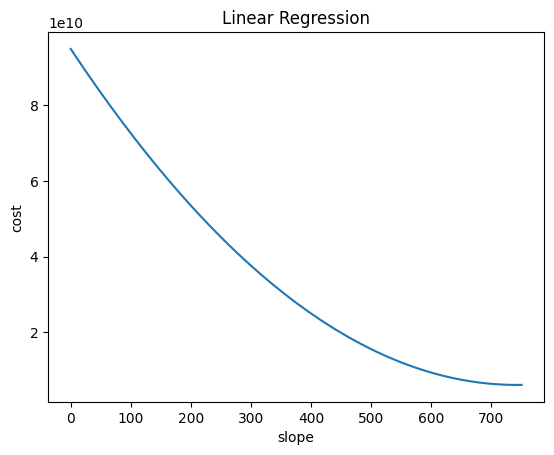

In [59]:
#printing the mean absolute error value

print("mean absolute error : ", __error_factor__(__prediction__(x_test, slope, bias), y_test))

#visualizing the gradient-descent

plt.title("Linear Regression")
plt.xlabel("slope")
plt.ylabel("cost")
plt.plot(slope_list, cost_list)
plt.show()